<a href="https://colab.research.google.com/github/mincfranc/DD_DataScience/blob/main/11_5_24_1a_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting
For this exercise, you will do the following

1. Read in the data located on AWS at [company_sales_data.csv]( https://ddc-datascience.s3.amazonaws.com/company_sales_data.csv ).
1. Create at least two different plots of the data. Try to be creative and think about what information someone might want to know about this data set. You can use any plotting libary you would like. Below are some resources to help if needed.
  - https://matplotlib.org/stable/gallery/index.html
  - https://seaborn.pydata.org/examples/index.html
  - https://plotly.com/python/plotly-express/
1. Make sure you add axis labels and a legend (if necessary). Make sure your colors are easy to differentiate and that your font is large enough to easily read.

Hint: You may need to do some data restructuring/manipulation to create certain plots. The pandas `melt` and `groupby` methods may be helpful.

Reference: [Reshaping Tables With Pandas](https://towardsdatascience.com/shape-tables-like-jelly-with-pandas-melt-and-pivot-f2e13e666d6)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots



In [40]:
url = "https://ddc-datascience.s3.amazonaws.com/company_sales_data.csv"

!curl -s -I {url}

HTTP/1.1 200 OK
x-amz-id-2: qTAvpDISwZUS1R1zKqXMLPel0DfALIWTYqrEi35cD2fKBbndgG033lEtqPrLCH04bdg7IJEXSRY=
x-amz-request-id: Z1N251HHYQ6EJDQK
Date: Wed, 06 Nov 2024 01:44:58 GMT
Last-Modified: Wed, 02 Aug 2023 23:36:45 GMT
ETag: "0bd8082ce309de7129a532bc0b9b26c7"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Server: AmazonS3
Content-Length: 659



In [41]:
#READ url into pandas with dataframe "df"

df= pd.read_csv(url)

In [4]:
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


In [5]:
df.shape

(12, 9)

In [6]:
df.tail()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700
10,11,2340,2100,7300,13300,2400,2100,41280,412800
11,12,2900,1760,7400,14400,1800,1760,30020,300200


In [7]:
df.columns

Index(['month_number', 'facecream', 'facewash', 'toothpaste', 'bathingsoap',
       'shampoo', 'moisturizer', 'total_units', 'total_profit'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   month_number  12 non-null     int64
 1   facecream     12 non-null     int64
 2   facewash      12 non-null     int64
 3   toothpaste    12 non-null     int64
 4   bathingsoap   12 non-null     int64
 5   shampoo       12 non-null     int64
 6   moisturizer   12 non-null     int64
 7   total_units   12 non-null     int64
 8   total_profit  12 non-null     int64
dtypes: int64(9)
memory usage: 992.0 bytes


In [8]:
#RETURN first 5 records sorted by total profits for each month and product type
df.sort_values(by="total_profit").head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
1,2,2630,1200,5100,6100,2100,1200,18330,183300
5,6,2760,1555,4890,7490,1890,1555,20140,201400
4,5,3600,1740,4560,7760,1560,1740,20960,209600
0,1,2500,1500,5200,9200,1200,1500,21100,211000
3,4,3400,1130,5870,8870,1870,1130,22270,222700


In [38]:
#RETURN first 5 records sorted by month number and total units in descending order
df.sort_values(by=['total_units', 'month_number'], ascending= False)

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
10,11,2340,2100,7300,13300,2400,2100,41280,412800
7,8,3700,1400,5860,9960,2860,1400,36140,361400
11,12,2900,1760,7400,14400,1800,1760,30020,300200
6,7,2980,1120,4780,8980,1780,1120,29550,295500
9,10,1990,1890,8300,10300,2300,1890,26670,266700
8,9,3540,1780,6100,8100,2100,1780,23400,234000
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
0,1,2500,1500,5200,9200,1200,1500,21100,211000
4,5,3600,1740,4560,7760,1560,1740,20960,209600


In [14]:
df.describe()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000
mean,6.500000,2873.333333,1542.916667,5825.833333,9500.833333,2117.500000,1542.916667,26027.50000,260275.000000
std,3.605551,584.595172,316.733745,1242.032486,2348.095779,617.724931,316.733745,7014.36594,70143.659404
min,1.000000,1990.000000,1120.000000,4550.000000,6100.000000,1200.000000,1120.000000,18330.00000,183300.000000
25%,3.750000,2460.000000,1305.000000,4862.500000,8015.000000,1795.000000,1305.000000,21065.00000,210650.000000
50%,6.500000,2830.000000,1527.500000,5530.000000,9090.000000,1995.000000,1527.500000,22935.00000,229350.000000
75%,9.250000,3435.000000,1765.000000,6400.000000,10045.000000,2325.000000,1765.000000,29667.50000,296675.000000
max,12.000000,3700.000000,2100.000000,8300.000000,14400.000000,3550.000000,2100.000000,41280.00000,412800.000000


In [32]:
soft_profit= df.groupby('total_profit').sum()
soft_profit

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units
total_profit,,,,,,,,
183300,2,2630,1200,5100,6100,2100,1200,18330
201400,6,2760,1555,4890,7490,1890,1555,20140
209600,5,3600,1740,4560,7760,1560,1740,20960
211000,1,2500,1500,5200,9200,1200,1500,21100
222700,4,3400,1130,5870,8870,1870,1130,22270


In [69]:
units= df.groupby("total_units").sum()
type(units)

pandas.core.frame.DataFrame

In [76]:
sorted_units= (units.sort_values(by=["total_units"], ascending=[False]))
type(sorted_units)
sorted_units.head().transpose()

total_units,41280,36140,30020,29550,26670
month_number,11,8,12,7,10
facecream,2340,3700,2900,2980,1990
facewash,2100,1400,1760,1120,1890
toothpaste,7300,5860,7400,4780,8300
bathingsoap,13300,9960,14400,8980,10300
shampoo,2400,2860,1800,1780,2300
moisturizer,2100,1400,1760,1120,1890
total_profit,412800,361400,300200,295500,266700


Questions to ask of sales df:



1.   Monthly Trends: How do the sales of each product category vary across different months? Are there any clear patterns or seasonality?
2.   Profit Contribution Analysis: How does each product category contribute to the total profit? Which products are the largest drivers of profit?
1.  Product-Specific Trends: Do specific products experience seasonal peaks? For example, is there higher demand for moisturizer in certain months?
1.  Product Bundling Opportunities: Based on the data, are there products that tend to sell well together, suggesting a bundling opportunity (e.g., face cream and face wash)?
1.  Potential for Sales Forecasting: Can this data be used to forecast future sales for each product? What modeling techniques would be best suited for this task?



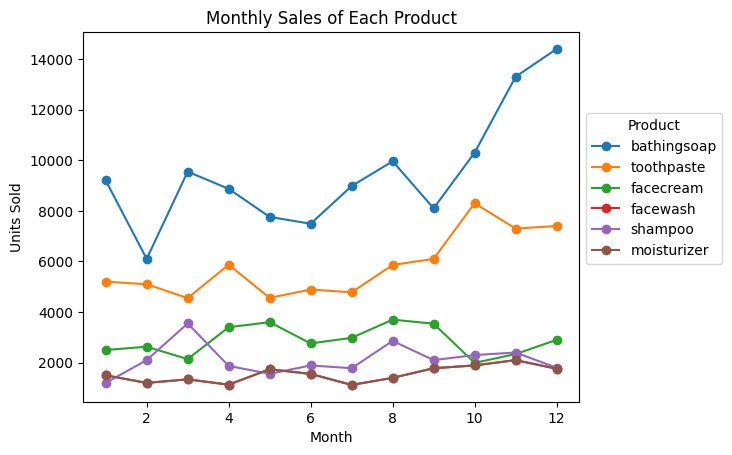

In [94]:
df.plot(
    x='month_number',
    y=['bathingsoap', 'toothpaste', 'facecream', 'facewash', 'shampoo', 'moisturizer'],
    kind='line',
    marker='o')
plt.title('Monthly Sales of Each Product')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.ylim()
plt.legend(title='Product', bbox_to_anchor=(1.0, 0.8), loc='upper left')
plt.show()

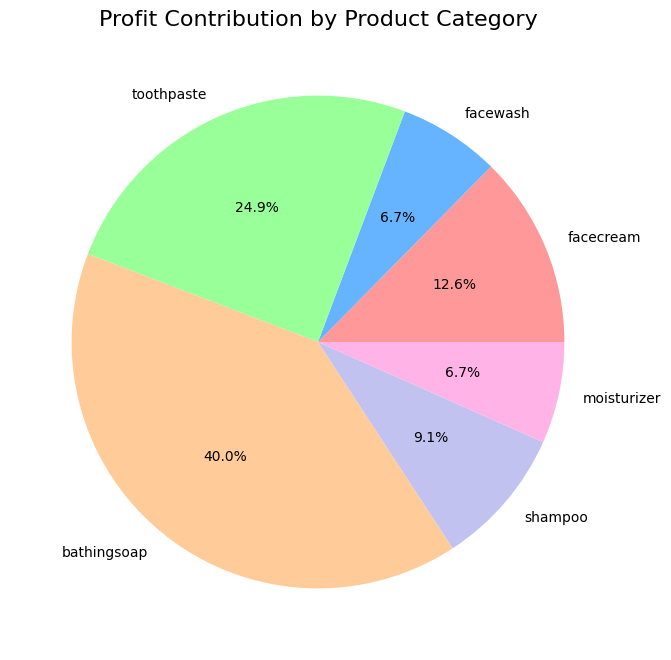

facecream      140.108203
facewash        74.023157
toothpaste     277.025627
bathingsoap    444.794959
shampoo        101.512275
moisturizer     74.023157
dtype: float64


In [99]:
#2.  Calculate the profit for each product in each month
# First, create a new dataframe to store the product profit percentages
products = ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']

# Create a new dataframe for profit contributions
profit_contributions = pd.DataFrame()

# Loop through each product and calculate its profit contribution
for product in products:
    profit_contributions[product] = (df[product] / df['total_units']) * df['total_profit']

# Calculate the percentage contribution of each product to the total profit
profit_contributions_percentage = profit_contributions.div(df['total_profit'], axis=0) * 100

# Sum the percentage contribution for each product across all months
total_profit_contribution = profit_contributions_percentage.sum()

# Plot the contribution of each product to the total profit as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_profit_contribution, labels=total_profit_contribution.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title('Profit Contribution by Product Category', fontsize=16)
plt.show()

# Print the profit contribution percentage for each product
print(total_profit_contribution)

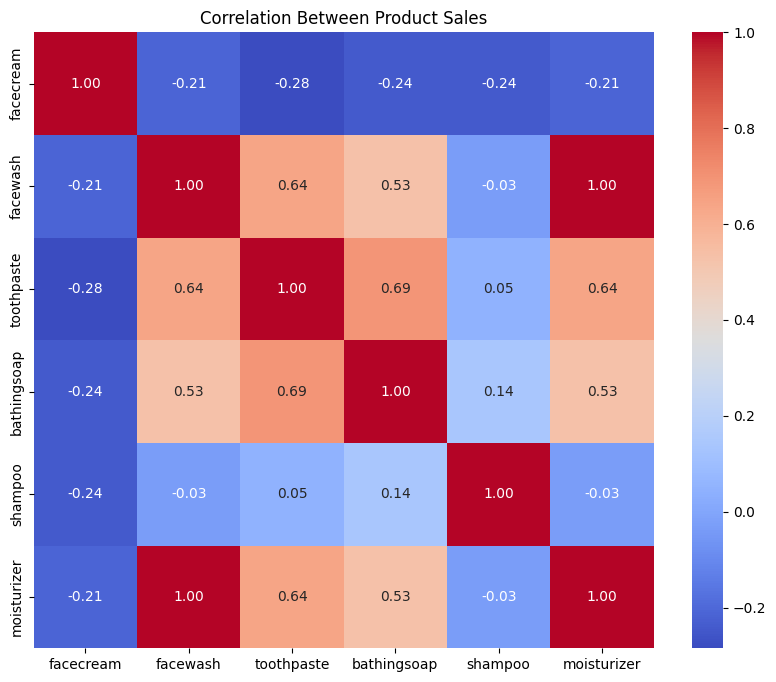

In [101]:
# Select the columns representing product sales
products = ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']
product_sales_df = df[products]

# Calculate the correlation matrix
correlation_matrix = product_sales_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Product Sales')
plt.show()

#facewash and moisturizer show strong positive correlation and would sell well bundled together

In [105]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

monthly_totals = df[['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']].sum(axis=1) # Calculate monthly totals

# Create subplot layout for Plotly
fig = make_subplots(rows=3, cols=2, subplot_titles=[
    "Monthly Sales of Each Product", "Total Units Sold by Product",
    "Distribution of Units Sold per Product", "Profit Contribution Over Time",
    "Total Units vs Total Profit", "Growth Rates of Each Product"
])

# Add traces for each question

# Monthly Sales of Each Product
for col in ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']:
    fig.add_trace(go.Scatter(x=df['month_number'], y=df[col], mode='lines+markers', name=col), row=1, col=1)

# Total Units Sold by Product
fig.add_trace(go.Bar(x=monthly_totals.index, y=monthly_totals.values, name='Total Units'), row=1, col=2)

# Distribution of Units Sold per Product
for col in ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']:
    fig.add_trace(go.Box(y=df[col], name=col), row=2, col=1)

# Profit Contribution Over Time
for col in ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']:
    fig.add_trace(go.Scatter(x=df['month_number'], y=df[col] * 100, mode='lines+markers', name=col), row=2, col=2)

# Total Units vs Total Profit
fig.add_trace(go.Scatter(x=df['total_units'], y=df['total_profit'], mode='markers', name="Total Units vs Profit"), row=3, col=1)

# Growth Rates of Each Product
for col in ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']:
    fig.add_trace(go.Scatter(x=df['month_number'], y=df[col].pct_change(), mode='lines+markers', name=col), row=3, col=2)

fig.update_layout(height=900, width=1000, title_text="Sales df Analysis", showlegend=False)
fig.show()
